In [163]:
import lsst.daf.butler as daf_butler
import numpy as np
import lsst.afw.image as afwImage
import lsst.afw.display as afwDisplay
from lsst.geom import SpherePoint,Angle
import astropy.units as u
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
import pandas as pd
Gaia.ROW_LIMIT = -1
afwDisplay.setDefaultBackend("firefly")

def coordToPix(wcs,ra,dec):
    spherePt = SpherePoint(Angle(ra*np.pi/180),Angle(dec*np.pi/180))
    return wcs.skyToPixel(spherePt)

In [164]:
collections=["u/elhoward/TOO/0725J",
             "u/elhoward/TOO/0725J/MMADS_candidates",
             "LSSTCam/runs/nightlyValidation/20250728/w_2025_30/DM-50157",
             "u/elhoward/TOO/0725J/DESGW_candidates_v2",
             "u/elhoward/TOO/0725J/test",
             "u/elhoward/TOO/0725J/test/doSubtractBackground",
             "u/elhoward/TOO/0725J/test/allowKernelSourceDetection"
            ]

# collections=["u/elhoward/TOO/0725J/AT2025sib",
#              "LSSTCam/runs/nightlyValidation/20250728/w_2025_30/DM-50157"
#             ]

# bobCollections = ["LSSTCam/runs/nightlyValidation/20250728/w_2025_30/DM-50157","u/rea3/test_0725J_v10_mask_v6"]

collections = ["u/rea3/too_0725J/SN10/",
               "u/elhoward/TOO/0725J/SN10_photometry/candidates",
               "LSSTCam/runs/nightlyValidation/20250728/w_2025_30/DM-50157",]
repo="embargo_new"

In [165]:
MyBut = daf_butler.Butler(repo,collections=collections)
# BobsBut = daf_butler.Butler(repo,collections=bobCollections)

In [166]:
finalVisits = []
for k in np.arange(2025072800099,2025072800159):
    if int(str(k)[-1])!=9:
        finalVisits.append(k)

In [108]:
detector = 25
visit = 2025072800105

In [109]:
RefButler = daf_butler.Butler("embargo", collections="refcats")

In [110]:
# simpleCat = RefButler.get("the_monster_20250219", dataId={"htm7":203118})

In [111]:
# simpleCat[0]

In [112]:
diffRefs = list(MyBut.query_datasets("difference_image",where=f"exposure={visit} and instrument='LSSTCam' and detector={detector}"))
tempRefs = list(MyBut.query_datasets("template_matched",where=f"exposure={visit} and instrument='LSSTCam' and detector={detector}"))
searchRefs = list(MyBut.query_datasets("preliminary_visit_image",where=f"exposure={visit} and instrument='LSSTCam' and detector={detector}"))
diaSourceRefs = list(MyBut.query_datasets("dia_source_unstandardized",where=f"exposure={visit} and instrument='LSSTCam' and detector={detector}"))
# searchRefs = list(BobsBut.query_datasets("difference_image",where=f"exposure={visit} and instrument='LSSTCam' and detector={detector}"))

In [113]:
diff = MyBut.get(diffRefs[0])
temp = MyBut.get(tempRefs[0])
search = MyBut.get(searchRefs[0])
diaSource = MyBut.get(diaSourceRefs[0])

In [114]:
tab = diaSource.asAstropy()

In [115]:
tab.colnames

['id',
 'coord_ra',
 'coord_dec',
 'parent',
 'coord_raErr',
 'coord_decErr',
 'coord_ra_dec_Cov',
 'is_negative',
 'detect_isPrimary',
 'base_SdssCentroid_x',
 'base_SdssCentroid_y',
 'base_SdssCentroid_xErr',
 'base_SdssCentroid_yErr',
 'base_SdssCentroid_flag',
 'base_CircularApertureFlux_flag_badCentroid',
 'base_PsfFlux_flag_badCentroid',
 'ext_shapeHSM_HsmPsfMoments_flag_badCentroid',
 'ext_shapeHSM_HsmSourceMoments_flag_badCentroid',
 'base_SdssCentroid_flag_edge',
 'base_CircularApertureFlux_flag_badCentroid_edge',
 'base_PsfFlux_flag_badCentroid_edge',
 'ext_shapeHSM_HsmPsfMoments_flag_badCentroid_edge',
 'ext_shapeHSM_HsmSourceMoments_flag_badCentroid_edge',
 'base_SdssCentroid_flag_noSecondDerivative',
 'base_CircularApertureFlux_flag_badCentroid_noSecondDerivative',
 'base_PsfFlux_flag_badCentroid_noSecondDerivative',
 'ext_shapeHSM_HsmPsfMoments_flag_badCentroid_noSecondDerivative',
 'ext_shapeHSM_HsmSourceMoments_flag_badCentroid_noSecondDerivative',
 'base_SdssCentroid_f

In [116]:
flagDict = {}

In [117]:
for name in tab.colnames:
    if tab[name].description.__contains__("ailure"):
        print("{}\n{}, {}".format(tab[name].name,tab[name].description,tab[name].dtype),end="\n\n")
        flagDict[name] = True

base_SdssCentroid_flag
General Failure Flag, bool

base_CircularApertureFlux_flag_badCentroid
General Failure Flag, bool

base_PsfFlux_flag_badCentroid
General Failure Flag, bool

ext_shapeHSM_HsmPsfMoments_flag_badCentroid
General Failure Flag, bool

ext_shapeHSM_HsmSourceMoments_flag_badCentroid
General Failure Flag, bool

ip_diffim_DipoleFit_flag
General failure flag for dipole fit, bool

slot_Centroid_flag
General failure flag for dipole fit, bool

ext_shapeHSM_HsmPsfMoments_flag
General failure flag, set if anything went wrong, bool

slot_PsfShape_flag
General failure flag, set if anything went wrong, bool

ext_shapeHSM_HsmPsfMoments_flag_galsim
GalSim failure, bool

slot_PsfShape_flag_galsim
GalSim failure, bool

ext_shapeHSM_HsmSourceMoments_flag
General failure flag, set if anything went wrong, bool

slot_Shape_flag
General failure flag, set if anything went wrong, bool

ext_shapeHSM_HsmSourceMoments_flag_galsim
GalSim failure, bool

slot_Shape_flag_galsim
GalSim failure, bool


In [118]:
for name in tab.colnames:
    if tab[name].name.lower().__contains__("base_pixelflags_flag"):
        print("{}\n{}, {}".format(tab[name].name,tab[name].description,tab[name].dtype),end="\n\n")
        # flagDict[name] = True

base_PixelFlags_flag
General failure flag, set if anything went wrong setting flags., bool

base_PixelFlags_flag_offimage
Source center is off image, bool

base_PixelFlags_flag_edge
Pixel in source outside usable exposure region (masked EDGE or centroid off image)., bool

base_PixelFlags_flag_nodata
NO_DATA pixel in the source footprint., bool

base_PixelFlags_flag_interpolated
Interpolated pixel in the Source footprint, bool

base_PixelFlags_flag_saturated
Saturated pixel in the Source footprint, bool

base_PixelFlags_flag_cr
Cosmic ray in the Source footprint, bool

base_PixelFlags_flag_bad
Bad pixel in the Source footprint, bool

base_PixelFlags_flag_suspect
Source''''s footprint includes suspect pixels, bool

base_PixelFlags_flag_edgeCenter
EDGE pixel in the 3x3 region around the centroid., bool

base_PixelFlags_flag_nodataCenter
NO_DATA pixel in the 3x3 region around the centroid., bool

base_PixelFlags_flag_interpolatedCenter
Interpolated pixel in the 3x3 region around the centro

In [119]:
for name in tab.colnames:
    if not tab[name].description.__contains__("ailure"):
        print("{}\n{}, {}".format(tab[name].name,tab[name].description,tab[name].dtype),end="\n\n")

id
unique ID, int64

coord_ra
position in ra/dec, float64

coord_dec
position in ra/dec, float64

parent
unique ID of parent source, int64

coord_raErr
1-sigma uncertainty on ra, float32

coord_decErr
1-sigma uncertainty on dec, float32

coord_ra_dec_Cov
uncertainty covariance between ra and dec, float32

is_negative
Set if source peak was detected as negative., bool

detect_isPrimary
True if source has no children and is not a sky source., bool

base_SdssCentroid_x
centroid from Sdss Centroid algorithm, float64

base_SdssCentroid_y
centroid from Sdss Centroid algorithm, float64

base_SdssCentroid_xErr
1-sigma uncertainty on x position, float32

base_SdssCentroid_yErr
1-sigma uncertainty on y position, float32

base_SdssCentroid_flag_edge
Object too close to edge; peak used., bool

base_CircularApertureFlux_flag_badCentroid_edge
Object too close to edge; peak used., bool

base_PsfFlux_flag_badCentroid_edge
Object too close to edge; peak used., bool

ext_shapeHSM_HsmPsfMoments_flag_badC

In [120]:
flagDict["ip_diffim_DipoleFit_classification"] = True
flagDict["base_PixelFlags_flag_edge"] = True
flagDict["base_PixelFlags_flag_nodata"] = True
flagDict["base_PixelFlags_flag_interpolatedCenter"] = True
flagDict["base_PixelFlags_flag_interpolated"] = True
flagDict["base_PixelFlags_flag_crCenter"] = True
flagDict["base_PixelFlags_flag_saturatedCenter"] = True
flagDict["base_PixelFlags_flag_bad"] = True
flagDict["slot_Centroid_flag"] = True
flagDict["slot_Centroid_flag_edge"] = True


In [121]:
flagDict

{'base_SdssCentroid_flag': True,
 'base_CircularApertureFlux_flag_badCentroid': True,
 'base_PsfFlux_flag_badCentroid': True,
 'ext_shapeHSM_HsmPsfMoments_flag_badCentroid': True,
 'ext_shapeHSM_HsmSourceMoments_flag_badCentroid': True,
 'ip_diffim_DipoleFit_flag': True,
 'slot_Centroid_flag': True,
 'ext_shapeHSM_HsmPsfMoments_flag': True,
 'slot_PsfShape_flag': True,
 'ext_shapeHSM_HsmPsfMoments_flag_galsim': True,
 'slot_PsfShape_flag_galsim': True,
 'ext_shapeHSM_HsmSourceMoments_flag': True,
 'slot_Shape_flag': True,
 'ext_shapeHSM_HsmSourceMoments_flag_galsim': True,
 'slot_Shape_flag_galsim': True,
 'base_CircularApertureFlux_12_0_flag': True,
 'slot_ApFlux_flag': True,
 'base_LocalPhotoCalib_flag': True,
 'base_LocalWcs_flag': True,
 'base_PixelFlags_flag': True,
 'base_PsfFlux_flag': True,
 'slot_PsfFlux_flag': True,
 'ip_diffim_forced_PsfFlux_flag': True,
 'ip_diffim_DipoleFit_classification': True,
 'base_PixelFlags_flag_edge': True,
 'base_PixelFlags_flag_nodata': True,
 'b

In [122]:
flagDict.pop("ip_diffim_DipoleFit_flag")

True

In [123]:
def flagFailure(row,fDict):
    for k,v in zip(fDict.keys(),fDict.values()):
        if row[k]==v:
            return True
    return False

In [124]:
init = len(tab)
passed=0
for r in tab:
    didFail=flagFailure(r,flagDict)
    if didFail:
        print("Row {} failed on {}".format(r.index,k))
    else:
        print("No failure for row {}".format(r.index))
        passed+=1
print("{}/{} passed flag cuts".format(passed,init))

No failure for row 0
No failure for row 1
No failure for row 2
No failure for row 3
No failure for row 4
No failure for row 5
No failure for row 6
No failure for row 7
No failure for row 8
No failure for row 9
No failure for row 10
No failure for row 11
No failure for row 12
No failure for row 13
No failure for row 14
No failure for row 15
No failure for row 16
No failure for row 17
No failure for row 18
No failure for row 19
No failure for row 20
No failure for row 21
No failure for row 22
No failure for row 23
No failure for row 24
No failure for row 25
No failure for row 26
No failure for row 27
No failure for row 28
No failure for row 29
No failure for row 30
No failure for row 31
No failure for row 32
No failure for row 33
No failure for row 34
No failure for row 35
No failure for row 36
No failure for row 37
No failure for row 38
No failure for row 39
No failure for row 40
No failure for row 41
No failure for row 42
No failure for row 43
No failure for row 44
No failure for row 4

In [141]:
diaSourceRefsMany = list(MyBut.query_datasets("dia_source_reliability",where=f"exposure in {tuple(int(x) for x in np.arange(2025072800099,2025072800158).astype(int))} and instrument='LSSTCam'"))
unstandSourceRefsMany = list(MyBut.query_datasets("dia_source_unstandardized",where=f"exposure in {tuple(int(x) for x in np.arange(2025072800099,2025072800158).astype(int))} and instrument='LSSTCam'"))

In [126]:
detArr=np.array([])
scoreArr = np.array([])
idArr = np.array([])
visitArr= np.array([])
filterArr= np.array([])
for ref in diaSourceRefsMany:
    source=MyBut.get(ref)
    # myTable=source.asAstropy()
    visitArr = np.append(visitArr,np.full(np.shape(source['score']),ref.dataId["visit"]))
    filterArr = np.append(filterArr,np.full(np.shape(source['score']),ref.dataId["band"]))
    scoreArr=np.append(scoreArr, source["score"])
    idArr=np.append(idArr, source["id"])
    detArr=np.append(detArr, np.full(np.shape(source["score"]),ref.dataId["detector"]))
candDF = pd.DataFrame(data=np.array([idArr,scoreArr,visitArr,filterArr,detArr]).T,columns=["id","score","visit","band","detector"])

In [127]:
len(np.unique(candDF["id"]))

723419

In [128]:
msk = candDF["score"].astype(float)<0.1 # Mask all candidates with a single score below 0.1

In [129]:
poorIds = candDF["id"][msk] # get IDs of thos candidates

In [130]:
newDF = candDF[~candDF["id"].isin(poorIds)] # Remove all entries of those candidates with a single score below 0.1

In [131]:
notBuggyMask = np.logical_or(newDF["score"].astype(float)>0.4863438308238984, 
                             newDF["score"].astype(float)<0.4863438308238983)

In [132]:
np.shape(newDF[notBuggyMask]) # Evaluating the total that aren't at the 'buggy' value

(28945, 5)

In [133]:
np.shape(newDF[~notBuggyMask]) # Evaluating the total that are at the 'buggy' value

(8865, 5)

In [134]:
len(newDF)

37810

In [135]:
badIdDF = newDF[newDF["score"].astype(float)==0.4863438308238983]

In [136]:
badIdDF["id"].astype(float).astype(int)

129        25011704064639108
1872       25011704735727620
1873       25011704735727620
1874       25011704735727620
3624       25011704869946648
                 ...        
2770653    25011709934568268
2770752    25011710068785152
2770753    25011710068785152
2771234    25011710068785720
2771235    25011710068785720
Name: id, Length: 8865, dtype: int64

In [137]:
badIdDF

id               score            visit band  \
129      2.5011704064639108e+16  0.4863438308238983  2025072800101.0    i   
1872      2.501170473572762e+16  0.4863438308238983  2025072800106.0    i   
1873      2.501170473572762e+16  0.4863438308238983  2025072800106.0    i   
1874      2.501170473572762e+16  0.4863438308238983  2025072800106.0    i   
3624      2.501170486994665e+16  0.4863438308238983  2025072800107.0    i   
...                         ...                 ...              ...  ...   
2770653  2.5011709934568268e+16  0.4863438308238983  2025072800144.0    r   
2770752   2.501171006878515e+16  0.4863438308238983  2025072800145.0    r   
2770753   2.501171006878515e+16  0.4863438308238983  2025072800145.0    r   
2771234   2.501171006878572e+16  0.4863438308238983  2025072800145.0    r   
2771235   2.501171006878572e+16  0.4863438308238983  2025072800145.0    r   

        detector  
129          0.0  
1872         0.0  
1873         0.0  
1874         0.0  
3624         0.0  
...          ...  
2770653    188.0  
2770752    188.0  
2770753    188.0  
2771234    188.0  
2771235    188.0  

[8865 rows x 5 columns]

In [148]:
c = MyBut.get(unstandSourceRefsMany[0])

In [150]:
cTab = c.asAstropy()

In [162]:
cTab[[int(x) in badIdDF["id"].astype(float).astype(int) for x in cTab["id"]]]

<Table length=0>
  id  coord_ra coord_dec ... merge_footprint_positive merge_footprint_negative
        rad       rad    ...                                                  
int64 float64   float64  ...           bool                     bool          
----- -------- --------- ... ------------------------ ------------------------

### Let's look at some of these strange entries centered at reliability ~0.48

(array([434., 246., 606., 402.]),
 array([2.0250728e+12, 2.0250728e+12, 2.0250728e+12, 2.0250728e+12,
        2.0250728e+12]),
 <BarContainer object of 4 artists>)

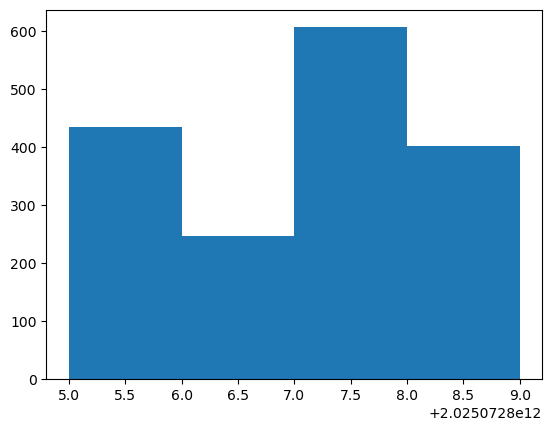

In [73]:
plt.hist(badIdDF["visit"].astype(float).astype(int),bins=np.arange(2025072800105,2025072800110))

(array([ 45.,  48.,  65.,  37., 105.,  50.,  56., 107.,  40.,  53.]),
 array([  0. ,  18.8,  37.6,  56.4,  75.2,  94. , 112.8, 131.6, 150.4,
        169.2, 188. ]),
 <BarContainer object of 10 artists>)

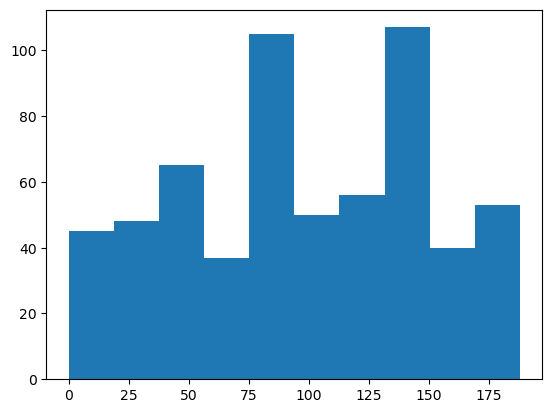

In [80]:
myMask = badIdDF["visit"].astype(float).astype(int)==2025072800107


(array([ 1., 47.]), array([83., 84., 85.]), <BarContainer object of 2 artists>)

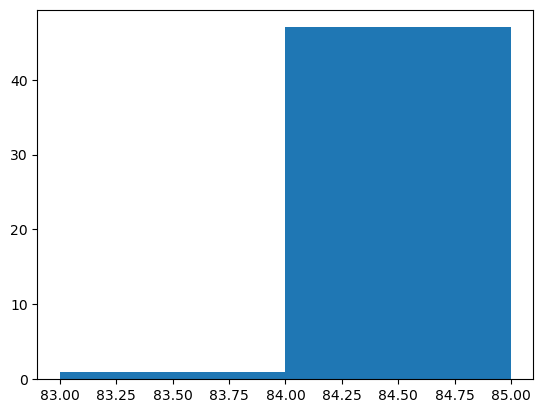

In [83]:
plt.hist(badIdDF[myMask]["detector"].astype(float).astype(int),bins=np.arange(83,86))


In [33]:
ninetyFourRefs = list(MyBut.query_datasets("dia_source_unfiltered",where=f"exposure in {tuple(int(x) for x in np.arange(2025072800099,2025072800158).astype(int))} and instrument='LSSTCam' and detector=133"))
diaSourceRefsMany = list(MyBut.query_datasets("dia_source_unfiltered",where=f"exposure in {tuple(int(x) for x in np.arange(2025072800099,2025072800158).astype(int))} and instrument='LSSTCam'"))

In [35]:
# for r in ninetyFourRefs:
#     s = MyBut.get(r)
    
#     for x in s["id"]:
#         if x in ids:
#             print(x,r.dataId["detector"],r.dataId["visit"])
#             # break

#### Let's try visit 2025072800107, detector 133

In [84]:
visit =2025072800107
detector=84

In [85]:
diffRefs = list(MyBut.query_datasets("difference_image",where=f"exposure={visit} and instrument='LSSTCam' and detector={detector}"))
tempRefs = list(MyBut.query_datasets("template_matched",where=f"exposure={visit} and instrument='LSSTCam' and detector={detector}"))
searchRefs = list(MyBut.query_datasets("preliminary_visit_image",where=f"exposure={visit} and instrument='LSSTCam' and detector={detector}"))
diaSourceRefs = list(MyBut.query_datasets("dia_source_unfiltered",where=f"exposure={visit} and instrument='LSSTCam' and detector={detector}"))
# searchRefs = list(BobsBut.query_datasets("difference_image",where=f"exposure={visit} and instrument='LSSTCam' and detector={detector}"))

In [86]:
diffRefs,tempRefs,searchRefs,diaSourceRefs

([DatasetRef(DatasetType('difference_image', {band, instrument, day_obs, detector, physical_filter, visit}, ExposureF), {instrument: 'LSSTCam', detector: 84, visit: 2025072800107, band: 'i', day_obs: 20250728, physical_filter: 'i_39'}, run='u/rea3/too_0725J/SN10//20250814T211435Z', id=60b7fcce-4db7-4501-8575-3ecc433ce0ec)],
 [DatasetRef(DatasetType('template_matched', {band, instrument, day_obs, detector, physical_filter, visit}, ExposureF), {instrument: 'LSSTCam', detector: 84, visit: 2025072800107, band: 'i', day_obs: 20250728, physical_filter: 'i_39'}, run='u/rea3/too_0725J/SN10//20250814T211435Z', id=b4e7ecc3-60fd-4026-bb10-6b81814256de)],
 [DatasetRef(DatasetType('preliminary_visit_image', {band, instrument, day_obs, detector, physical_filter, visit}, ExposureF), {instrument: 'LSSTCam', detector: 84, visit: 2025072800107, band: 'i', day_obs: 20250728, physical_filter: 'i_39'}, run='u/rea3/too_0725J/SN10//20250814T211435Z', id=7d68d404-70f7-4f88-a929-be3b58197113)],
 [DatasetRef(Da

In [92]:
diff = MyBut.get(diffRefs[0])
temp = MyBut.get(tempRefs[0])
search = MyBut.get(searchRefs[0])
diaSource = MyBut.get(diaSourceRefs[0])

In [88]:
tab = diaSource.asAstropy()

In [89]:
msk = [x in np.array(badIdDF["id"]).astype(float).astype(int) for x in tab['id']]

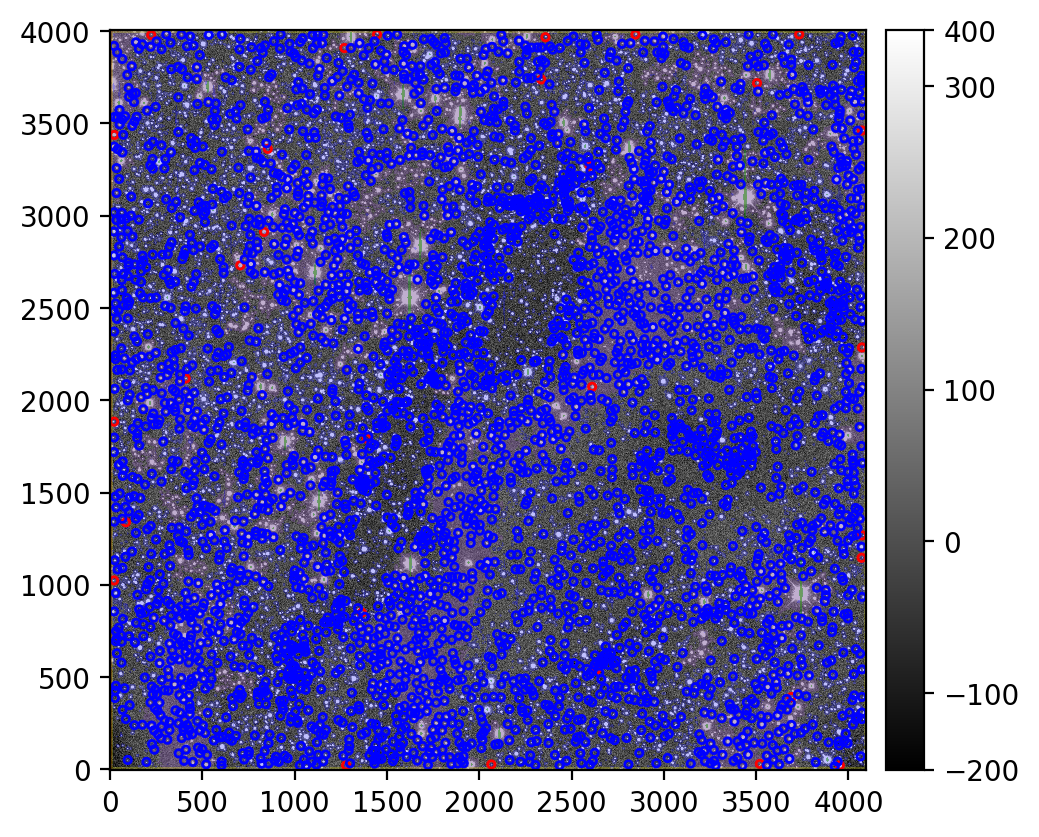

In [90]:
display = afwDisplay.Display(frame=0,dpi=200)
display.scale('linear', 'zscale')
display.image(search)

scale=0.001
thisWCS = search.getWcs()
with display.Buffering():
    for myx,myy in zip(tab[msk]["base_SdssCentroid_x"],tab[msk]["base_SdssCentroid_y"]):
        display.dot("o",myx,myy,ctype='red',size=20)
    for myx,myy in zip(tab[~np.array(msk)]["base_SdssCentroid_x"],tab[~np.array(msk)]["base_SdssCentroid_y"]):
        display.dot("o",myx,myy,ctype='blue',size=20)
    # for record in relRows[::2]:
    #     start = coordToPix(thisWCS,record["ra"],record["dec"])
    #     display.dot("o",start[0],start[1],size=10,ctype="orange")
    #     end = coordToPix(thisWCS,record["ra"]+scale*record["pmra"],record["dec"]+scale*record["pmdec"])
    #     end1 = coordToPix(thisWCS,record["ra"]+0.1*scale*record["pmra"],record["dec"]+0.1*scale*record["pmdec"])
    #     display.line([start,end], ctype='orange')
    # coordPix = coordToPix(thisWCS,center_ra,center_dec)
    # display.dot("o",coordPix[0],coordPix[1],size=20,ctype="red")

In [100]:
display = afwDisplay.Display(frame=1,dpi=200)
display.scale('linear', 'zscale')
display.image(temp)

scale=0.001
thisWCS = temp.getWcs()
with display.Buffering():
    for myx,myy in zip(tab[msk]["base_SdssCentroid_x"],tab[msk]["base_SdssCentroid_y"]):
        display.dot("o",myx,myy,ctype='red',size=20)
    # for record in relRows[::2]:
    #     start = coordToPix(thisWCS,record["ra"],record["dec"])
    #     display.dot("o",start[0],start[1],size=10,ctype="orange")
    #     end = coordToPix(thisWCS,record["ra"]+scale*record["pmra"],record["dec"]+scale*record["pmdec"])
    #     end1 = coordToPix(thisWCS,record["ra"]+0.1*scale*record["pmra"],record["dec"]+0.1*scale*record["pmdec"])
    # #     display.line([start,end], ctype='orange')
    # coordPix = coordToPix(thisWCS,center_ra,center_dec)
    # display.dot("o",coordPix[0],coordPix[1],size=20,ctype="red")

AssertionError: minimum and maximum values must not be equal

<Figure size 1280x960 with 0 Axes>

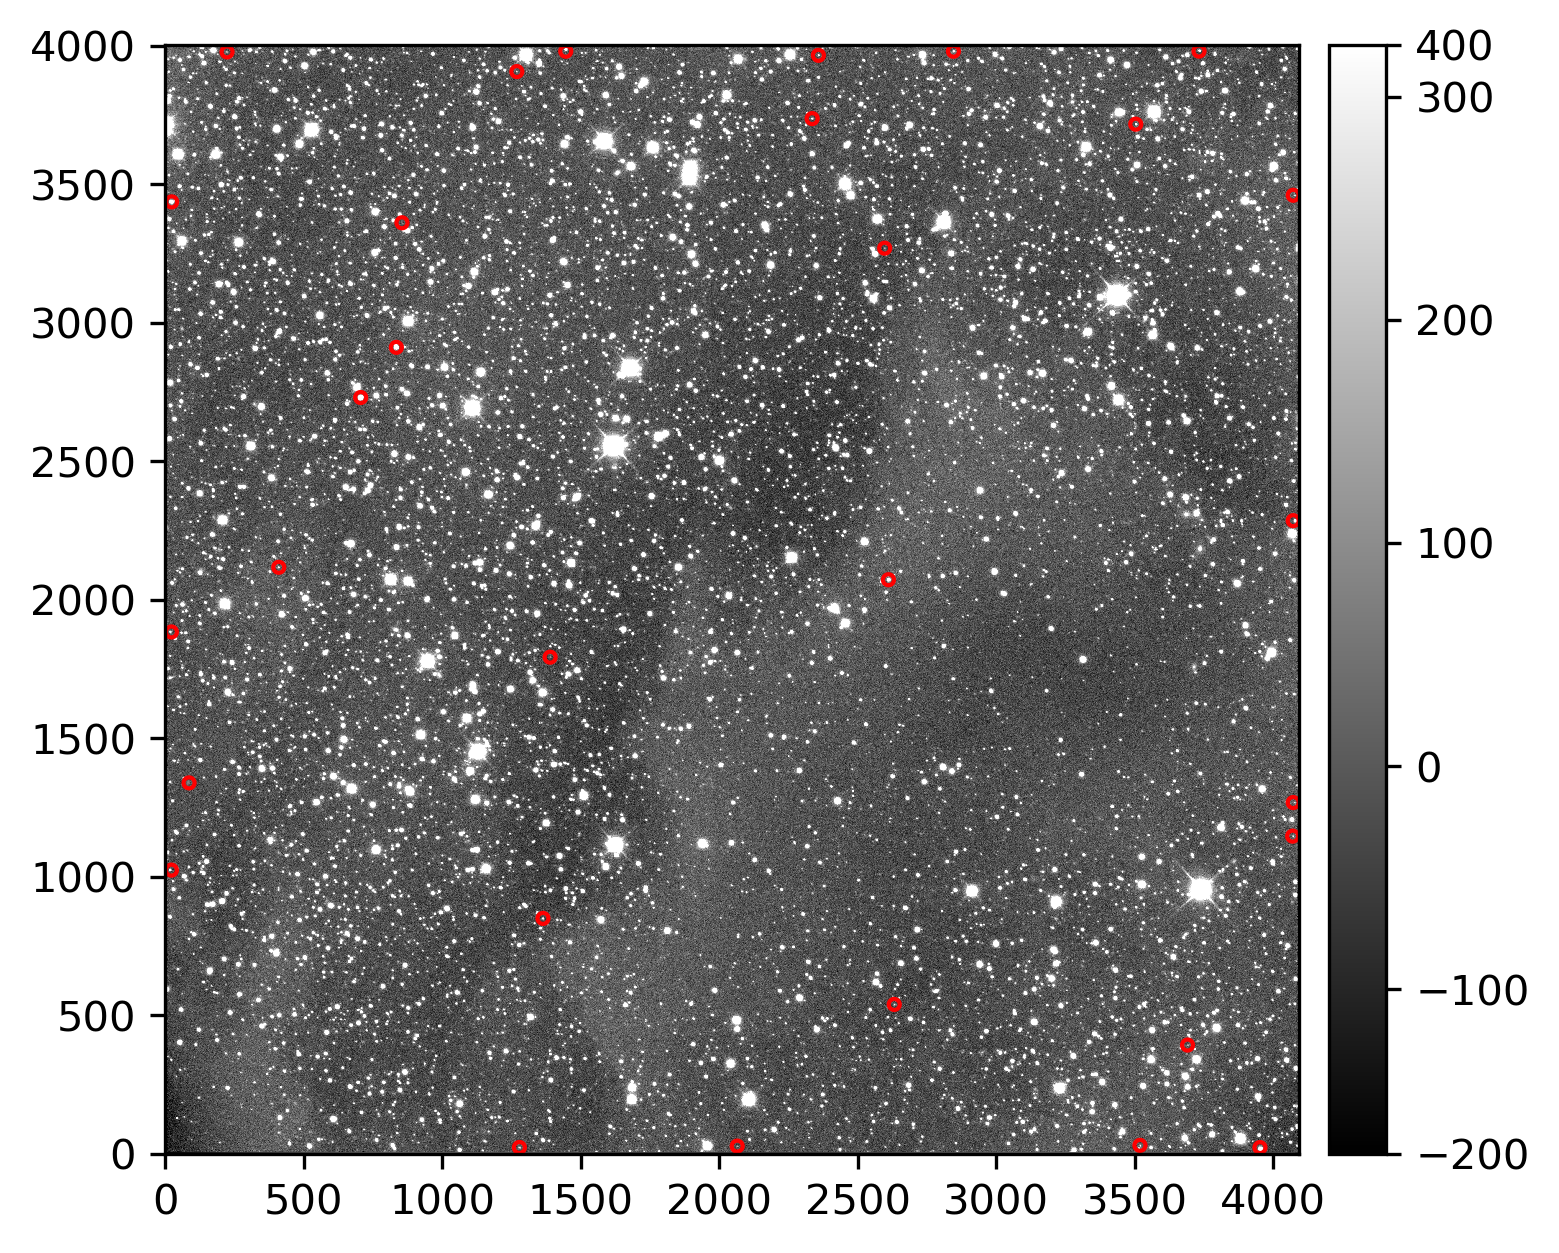

In [108]:
display = afwDisplay.Display(frame=2,dpi=300)
display.setMaskTransparency(100)
display.scale('linear', 'zscale')
display.image(diff)

scale=0.001
thisWCS = diff.getWcs()
with display.Buffering():
    # for record in relRows:
    #     start = coordToPix(thisWCS,record["ra"],record["dec"])
    #     display.dot("o",start[0],start[1],size=10,ctype="orange")
    #     end = coordToPix(thisWCS,record["ra"]+scale*record["pmra"],record["dec"]+scale*record["pmdec"])
    #     end1 = coordToPix(thisWCS,record["ra"]+0.1*scale*record["pmra"],record["dec"]+0.1*scale*record["pmdec"])
    #     display.line([start,end], ctype='orange')
    # coordPix = coordToPix(thisWCS,center_ra,center_dec)
    # display.dot("o",coordPix[0],coordPix[1],size=20,ctype="red")
    for myx,myy in zip(tab[msk]["base_SdssCentroid_x"],tab[msk]["base_SdssCentroid_y"]):
        display.dot("o",myx,myy,ctype='red',size=20)

In [369]:
# # This was used for the dia_source_unfiltered

# passList,initList = [],[]
# for ref in diaSourceRefsMany:
#     source = MyBut.get(ref)
#     myTable = source.asAstropy()
#     init = len(myTable)
#     passed=0
#     for r in myTable:
#         didFail=flagFailure(r,flagDict)
#         if didFail:
#             # print("Row {} failed on {}".format(r.index,k))
#             continue
#         else:
#             # print("No failure for row {}".format(r.index))
#             passed+=1
#     # print("{}/{} passed flag cuts".format(passed,init))
#     passList.append(passed)
#     initList.append(init)

In [573]:
idx = candDF[msk].groupby("id")["score"].idxmax()

# Select those rows
df_max = candDF.loc[idx].reset_index(drop=True)

In [569]:
# df_max['score']

In [570]:
# np.nanpercentile(df_max['score'],[0,1,50,90,99,100])

In [571]:
df_max["score"]

0         0.4863438308238983
1         0.4863438308238983
2         0.4863438308238983
3         0.4863438308238983
4         0.4863438308238983
                 ...        
141944                   1.0
141945                   1.0
141946    0.4863438308238983
141947    0.4863438308238983
141948    0.4863438308238983
Name: score, Length: 141949, dtype: object

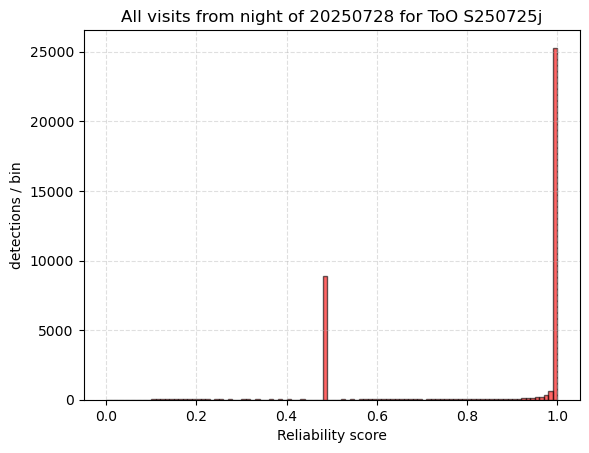

In [586]:
plt.hist(newDF["score"].astype(float),bins=np.arange(0,1.01,step=0.01),
         histtype="barstacked",color="red",alpha=0.6,edgecolor='black')
plt.ylabel("detections / bin")
plt.xlabel("Reliability score")
plt.grid(ls="--",alpha=0.4)
plt.title("All visits from night of 20250728 for ToO S250725j".format(visit))
plt.show()

In [489]:
len(df_max[df_max["score"]>0.1])/len(df_max)

0.1962196182295461

In [469]:
decile=[]
for k in np.arange(0,1,step=0.001):
    decile.append(len(np.where(df_max["score"]>k)[0]))

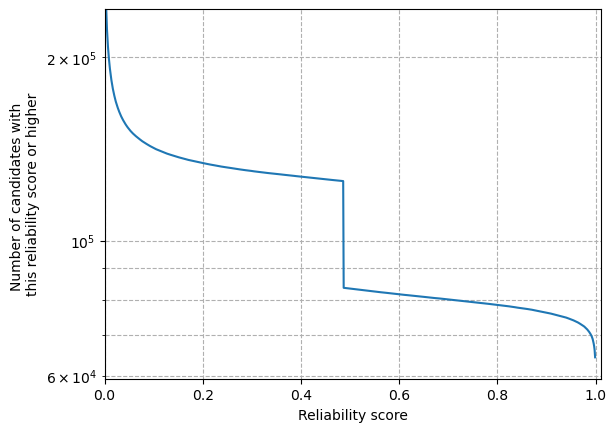

In [486]:
fig,ax = plt.subplots()
ax.semilogy()
ax.plot(np.arange(0,1,step=0.001),decile)
ax.grid(ls="--",which="both")
ax.set_ylabel("Number of candidates with \nthis reliability score or higher")
ax.set_xlabel("Reliability score")
ax.set_ylim(np.min(decile)-5E3,2.4E5)
ax.set_xlim(0,1.01)
plt.show()

In [493]:
len(df_max[df_max["score"]>0.1])/len(df_max["score"]),len(df_max[df_max["score"]>0.1])

(0.1962196182295461, 141949)

## Break

In [256]:
Gaia.MAIN_GAIA_TABLE = "gaiadr3.gaia_source" 

In [257]:
center_ra = 234.755524
center_dec = -36.425993
rad = u.Quantity(.3, u.deg)
cols = ['ra', 'dec', 'pmra',"pmdec"]

In [258]:
coord = SkyCoord(ra=center_ra, dec=center_dec, unit=(u.degree, u.degree), frame='icrs')
r = Gaia.query_object_async(coordinate=coord, height=rad,width=rad, columns=cols)

INFO: Query finished. [astroquery.utils.tap.core]


In [259]:
gaia_table = r.to_pandas()

relRows = []

for __, row in gaia_table.iterrows():
    if not np.isnan(row[["ra","dec","pmra","pmdec"]].values).any():
        relRows.append(row[["ra","dec","pmra","pmdec"]])

In [263]:
display = afwDisplay.Display(frame=0,dpi=200)
display.scale('linear', 'zscale')
display.image(search)

scale=0.001
thisWCS = search.getWcs()
with display.Buffering():
    for myx,myy in zip(tab["base_SdssCentroid_x"],tab["base_SdssCentroid_y"]):
        display.dot("o",myx,myy,ctype='blue',size=20)
    # for record in relRows[::2]:
    #     start = coordToPix(thisWCS,record["ra"],record["dec"])
    #     display.dot("o",start[0],start[1],size=10,ctype="orange")
    #     end = coordToPix(thisWCS,record["ra"]+scale*record["pmra"],record["dec"]+scale*record["pmdec"])
    #     end1 = coordToPix(thisWCS,record["ra"]+0.1*scale*record["pmra"],record["dec"]+0.1*scale*record["pmdec"])
    #     display.line([start,end], ctype='orange')
    # coordPix = coordToPix(thisWCS,center_ra,center_dec)
    # display.dot("o",coordPix[0],coordPix[1],size=20,ctype="red")

In [264]:
display = afwDisplay.Display(frame=1,dpi=200)
display.scale('asinh', 'zscale')
display.image(temp)

scale=0.001
thisWCS = temp.getWcs()
with display.Buffering():
    # for record in relRows[::2]:
    #     start = coordToPix(thisWCS,record["ra"],record["dec"])
    #     display.dot("o",start[0],start[1],size=10,ctype="orange")
    #     end = coordToPix(thisWCS,record["ra"]+scale*record["pmra"],record["dec"]+scale*record["pmdec"])
    #     end1 = coordToPix(thisWCS,record["ra"]+0.1*scale*record["pmra"],record["dec"]+0.1*scale*record["pmdec"])
    #     display.line([start,end], ctype='orange')
    coordPix = coordToPix(thisWCS,center_ra,center_dec)
    display.dot("o",coordPix[0],coordPix[1],size=20,ctype="red")

In [265]:
display = afwDisplay.Display(frame=2,dpi=300)
display.setMaskTransparency(100)
display.scale('linear', 'zscale')
display.image(diff)

scale=0.001
thisWCS = diff.getWcs()
with display.Buffering():
    for record in relRows:
        start = coordToPix(thisWCS,record["ra"],record["dec"])
        display.dot("o",start[0],start[1],size=10,ctype="orange")
        end = coordToPix(thisWCS,record["ra"]+scale*record["pmra"],record["dec"]+scale*record["pmdec"])
        end1 = coordToPix(thisWCS,record["ra"]+0.1*scale*record["pmra"],record["dec"]+0.1*scale*record["pmdec"])
        display.line([start,end], ctype='orange')
    coordPix = coordToPix(thisWCS,center_ra,center_dec)
    display.dot("o",coordPix[0],coordPix[1],size=20,ctype="red")